## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  49.919000  1641.845150  0.965943  2.997283  1.554069
1  16.329634  1270.772907  0.258749  7.339953  1.640957
2  13.565477  1315.681664  0.242511  2.084675  1.674350
3  98.011802  1405.846188  0.545280  7.353003  1.446735
4  70.123197  1250.401030  0.970556  3.833616  1.681780


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.56756 | train_mse: 5.72306 | train_mae: 1.75015 |  0:00:00s
epoch 1  | loss: 1.20029 | train_mse: 4.30403 | train_mae: 1.53395 |  0:00:00s


epoch 2  | loss: 1.08505 | train_mse: 3.84779 | train_mae: 1.45218 |  0:00:00s
epoch 3  | loss: 1.03318 | train_mse: 3.03207 | train_mae: 1.28327 |  0:00:00s


epoch 4  | loss: 1.25493 | train_mse: 2.50636 | train_mae: 1.1818  |  0:00:00s
epoch 5  | loss: 1.04139 | train_mse: 1.90662 | train_mae: 1.04202 |  0:00:00s


epoch 6  | loss: 0.94282 | train_mse: 1.68672 | train_mae: 0.97305 |  0:00:00s
epoch 7  | loss: 0.78542 | train_mse: 1.53891 | train_mae: 0.93584 |  0:00:00s
epoch 8  | loss: 1.06868 | train_mse: 1.37099 | train_mae: 0.90037 |  0:00:01s


epoch 9  | loss: 1.01112 | train_mse: 1.22271 | train_mae: 0.8502  |  0:00:01s
epoch 10 | loss: 0.7536  | train_mse: 1.1141  | train_mae: 0.80932 |  0:00:01s
epoch 11 | loss: 0.77555 | train_mse: 1.03573 | train_mae: 0.78035 |  0:00:01s


epoch 12 | loss: 0.69702 | train_mse: 0.97457 | train_mae: 0.75537 |  0:00:01s
epoch 13 | loss: 0.88843 | train_mse: 0.91524 | train_mae: 0.73749 |  0:00:01s


epoch 14 | loss: 0.82185 | train_mse: 0.87575 | train_mae: 0.71784 |  0:00:01s
epoch 15 | loss: 0.70398 | train_mse: 0.82865 | train_mae: 0.69948 |  0:00:01s


epoch 16 | loss: 0.6049  | train_mse: 0.75634 | train_mae: 0.6766  |  0:00:01s
epoch 17 | loss: 0.78738 | train_mse: 0.72162 | train_mae: 0.66158 |  0:00:01s
epoch 18 | loss: 0.62808 | train_mse: 0.68956 | train_mae: 0.64433 |  0:00:02s


epoch 19 | loss: 0.58233 | train_mse: 0.65586 | train_mae: 0.63085 |  0:00:02s
epoch 20 | loss: 0.64375 | train_mse: 0.6159  | train_mae: 0.6139  |  0:00:02s
epoch 21 | loss: 0.62725 | train_mse: 0.58881 | train_mae: 0.59821 |  0:00:02s


epoch 22 | loss: 0.40011 | train_mse: 0.55544 | train_mae: 0.57974 |  0:00:02s
epoch 23 | loss: 0.47597 | train_mse: 0.52398 | train_mae: 0.56261 |  0:00:02s


epoch 24 | loss: 0.64814 | train_mse: 0.50747 | train_mae: 0.55479 |  0:00:02s
epoch 25 | loss: 0.62906 | train_mse: 0.48997 | train_mae: 0.54655 |  0:00:02s
epoch 26 | loss: 0.52397 | train_mse: 0.47174 | train_mae: 0.5385  |  0:00:02s


epoch 27 | loss: 0.46555 | train_mse: 0.46353 | train_mae: 0.53423 |  0:00:03s
epoch 28 | loss: 0.50145 | train_mse: 0.45382 | train_mae: 0.53056 |  0:00:03s
epoch 29 | loss: 0.46861 | train_mse: 0.45044 | train_mae: 0.53088 |  0:00:03s


epoch 30 | loss: 0.52092 | train_mse: 0.44831 | train_mae: 0.5303  |  0:00:03s
epoch 31 | loss: 0.41989 | train_mse: 0.44207 | train_mae: 0.52515 |  0:00:03s


epoch 32 | loss: 0.37492 | train_mse: 0.42267 | train_mae: 0.5116  |  0:00:03s
epoch 33 | loss: 0.46797 | train_mse: 0.39722 | train_mae: 0.49627 |  0:00:03s


epoch 34 | loss: 0.4731  | train_mse: 0.36736 | train_mae: 0.47547 |  0:00:03s
epoch 35 | loss: 0.49834 | train_mse: 0.34553 | train_mae: 0.45865 |  0:00:03s
epoch 36 | loss: 0.42146 | train_mse: 0.33143 | train_mae: 0.44657 |  0:00:03s


epoch 37 | loss: 0.49111 | train_mse: 0.31957 | train_mae: 0.43532 |  0:00:04s
epoch 38 | loss: 0.3645  | train_mse: 0.31214 | train_mae: 0.42893 |  0:00:04s
epoch 39 | loss: 0.4136  | train_mse: 0.307   | train_mae: 0.42581 |  0:00:04s


epoch 40 | loss: 0.42215 | train_mse: 0.29498 | train_mae: 0.41406 |  0:00:04s
epoch 41 | loss: 0.36963 | train_mse: 0.28416 | train_mae: 0.40254 |  0:00:04s
epoch 42 | loss: 0.44022 | train_mse: 0.2715  | train_mae: 0.38946 |  0:00:04s


epoch 43 | loss: 0.40871 | train_mse: 0.26181 | train_mae: 0.38212 |  0:00:04s
epoch 44 | loss: 0.63593 | train_mse: 0.25683 | train_mae: 0.37972 |  0:00:04s


epoch 45 | loss: 0.32    | train_mse: 0.24827 | train_mae: 0.37371 |  0:00:04s
epoch 46 | loss: 0.4415  | train_mse: 0.23641 | train_mae: 0.36179 |  0:00:04s
epoch 47 | loss: 0.40112 | train_mse: 0.22905 | train_mae: 0.35515 |  0:00:05s


epoch 48 | loss: 0.33988 | train_mse: 0.21874 | train_mae: 0.34617 |  0:00:05s
epoch 49 | loss: 0.3729  | train_mse: 0.21212 | train_mae: 0.34147 |  0:00:05s
epoch 50 | loss: 0.25645 | train_mse: 0.20864 | train_mae: 0.34015 |  0:00:05s


epoch 51 | loss: 0.31166 | train_mse: 0.20619 | train_mae: 0.33984 |  0:00:05s
epoch 52 | loss: 0.29866 | train_mse: 0.20399 | train_mae: 0.33958 |  0:00:05s


epoch 53 | loss: 0.34978 | train_mse: 0.20177 | train_mae: 0.33714 |  0:00:05s
epoch 54 | loss: 0.45293 | train_mse: 0.19676 | train_mae: 0.32894 |  0:00:05s


epoch 55 | loss: 0.39937 | train_mse: 0.18758 | train_mae: 0.31615 |  0:00:05s
epoch 56 | loss: 0.35721 | train_mse: 0.18679 | train_mae: 0.31578 |  0:00:05s
epoch 57 | loss: 0.24747 | train_mse: 0.18282 | train_mae: 0.31215 |  0:00:06s


epoch 58 | loss: 0.37993 | train_mse: 0.18071 | train_mae: 0.30841 |  0:00:06s
epoch 59 | loss: 0.29001 | train_mse: 0.17956 | train_mae: 0.30705 |  0:00:06s
epoch 60 | loss: 0.34049 | train_mse: 0.17989 | train_mae: 0.3093  |  0:00:06s


epoch 61 | loss: 0.24647 | train_mse: 0.18256 | train_mae: 0.31123 |  0:00:06s
epoch 62 | loss: 0.26091 | train_mse: 0.18473 | train_mae: 0.31342 |  0:00:06s
epoch 63 | loss: 0.30022 | train_mse: 0.18508 | train_mae: 0.31616 |  0:00:06s


epoch 64 | loss: 0.34343 | train_mse: 0.19    | train_mae: 0.32315 |  0:00:06s
epoch 65 | loss: 0.27975 | train_mse: 0.19428 | train_mae: 0.32611 |  0:00:06s
epoch 66 | loss: 0.33274 | train_mse: 0.19033 | train_mae: 0.32334 |  0:00:06s


epoch 67 | loss: 0.34172 | train_mse: 0.18634 | train_mae: 0.31976 |  0:00:07s
epoch 68 | loss: 0.26253 | train_mse: 0.18107 | train_mae: 0.31373 |  0:00:07s
epoch 69 | loss: 0.26307 | train_mse: 0.17968 | train_mae: 0.31386 |  0:00:07s


epoch 70 | loss: 0.21202 | train_mse: 0.17704 | train_mae: 0.3146  |  0:00:07s
epoch 71 | loss: 0.2992  | train_mse: 0.17297 | train_mae: 0.3121  |  0:00:07s
epoch 72 | loss: 0.50861 | train_mse: 0.16944 | train_mae: 0.31154 |  0:00:07s


epoch 73 | loss: 0.25819 | train_mse: 0.16456 | train_mae: 0.31006 |  0:00:07s
epoch 74 | loss: 0.27498 | train_mse: 0.15995 | train_mae: 0.3072  |  0:00:07s


epoch 75 | loss: 0.29893 | train_mse: 0.15933 | train_mae: 0.30891 |  0:00:07s
epoch 76 | loss: 0.40258 | train_mse: 0.15842 | train_mae: 0.30889 |  0:00:07s
epoch 77 | loss: 0.4027  | train_mse: 0.15893 | train_mae: 0.30894 |  0:00:07s


epoch 78 | loss: 0.61177 | train_mse: 0.16064 | train_mae: 0.30969 |  0:00:08s
epoch 79 | loss: 0.23332 | train_mse: 0.16403 | train_mae: 0.30934 |  0:00:08s
epoch 80 | loss: 0.18986 | train_mse: 0.16422 | train_mae: 0.30899 |  0:00:08s


epoch 81 | loss: 0.24552 | train_mse: 0.16132 | train_mae: 0.3072  |  0:00:08s
epoch 82 | loss: 0.23124 | train_mse: 0.15561 | train_mae: 0.30309 |  0:00:08s


epoch 83 | loss: 0.24453 | train_mse: 0.15142 | train_mae: 0.30059 |  0:00:08s
epoch 84 | loss: 0.16941 | train_mse: 0.14905 | train_mae: 0.29693 |  0:00:08s


epoch 85 | loss: 0.3333  | train_mse: 0.14286 | train_mae: 0.29194 |  0:00:08s
epoch 86 | loss: 0.23509 | train_mse: 0.14081 | train_mae: 0.29078 |  0:00:08s
epoch 87 | loss: 0.17355 | train_mse: 0.14348 | train_mae: 0.29393 |  0:00:08s


epoch 88 | loss: 0.3022  | train_mse: 0.14558 | train_mae: 0.29696 |  0:00:09s
epoch 89 | loss: 0.23686 | train_mse: 0.14402 | train_mae: 0.29602 |  0:00:09s


epoch 90 | loss: 0.27894 | train_mse: 0.14382 | train_mae: 0.29773 |  0:00:09s
epoch 91 | loss: 0.27263 | train_mse: 0.14417 | train_mae: 0.29969 |  0:00:09s
epoch 92 | loss: 0.26634 | train_mse: 0.14417 | train_mae: 0.29945 |  0:00:09s


epoch 93 | loss: 0.43947 | train_mse: 0.14652 | train_mae: 0.30128 |  0:00:09s
epoch 94 | loss: 0.31257 | train_mse: 0.14754 | train_mae: 0.30205 |  0:00:09s


epoch 95 | loss: 0.22596 | train_mse: 0.14643 | train_mae: 0.30239 |  0:00:09s
epoch 96 | loss: 0.3171  | train_mse: 0.14354 | train_mae: 0.29918 |  0:00:09s
epoch 97 | loss: 0.26128 | train_mse: 0.13804 | train_mae: 0.2947  |  0:00:09s


epoch 98 | loss: 0.17906 | train_mse: 0.13353 | train_mae: 0.29164 |  0:00:10s
epoch 99 | loss: 0.48151 | train_mse: 0.12952 | train_mae: 0.28514 |  0:00:10s
epoch 100| loss: 0.36664 | train_mse: 0.12875 | train_mae: 0.281   |  0:00:10s


epoch 101| loss: 0.25406 | train_mse: 0.13249 | train_mae: 0.28243 |  0:00:10s
epoch 102| loss: 0.21445 | train_mse: 0.13611 | train_mae: 0.2864  |  0:00:10s
epoch 103| loss: 0.29129 | train_mse: 0.13576 | train_mae: 0.28691 |  0:00:10s


epoch 104| loss: 0.31027 | train_mse: 0.14144 | train_mae: 0.29583 |  0:00:10s


epoch 105| loss: 0.20365 | train_mse: 0.14869 | train_mae: 0.30167 |  0:00:10s
epoch 106| loss: 0.22091 | train_mse: 0.151   | train_mae: 0.3031  |  0:00:10s
epoch 107| loss: 0.22024 | train_mse: 0.14655 | train_mae: 0.29856 |  0:00:10s


epoch 108| loss: 0.19709 | train_mse: 0.1458  | train_mae: 0.29819 |  0:00:11s
epoch 109| loss: 0.30673 | train_mse: 0.14453 | train_mae: 0.29782 |  0:00:11s
epoch 110| loss: 0.19111 | train_mse: 0.14321 | train_mae: 0.29921 |  0:00:11s


epoch 111| loss: 0.44049 | train_mse: 0.1436  | train_mae: 0.30059 |  0:00:11s
epoch 112| loss: 0.26799 | train_mse: 0.14644 | train_mae: 0.30163 |  0:00:11s
epoch 113| loss: 0.21759 | train_mse: 0.14819 | train_mae: 0.30253 |  0:00:11s


epoch 114| loss: 0.62918 | train_mse: 0.15334 | train_mae: 0.30529 |  0:00:11s


epoch 115| loss: 0.30576 | train_mse: 0.15963 | train_mae: 0.30945 |  0:00:11s


epoch 116| loss: 0.2359  | train_mse: 0.162   | train_mae: 0.31241 |  0:00:12s
epoch 117| loss: 0.27926 | train_mse: 0.16269 | train_mae: 0.31351 |  0:00:12s


epoch 118| loss: 0.24783 | train_mse: 0.16137 | train_mae: 0.31204 |  0:00:12s
epoch 119| loss: 0.21077 | train_mse: 0.15706 | train_mae: 0.30875 |  0:00:12s
epoch 120| loss: 0.17664 | train_mse: 0.14755 | train_mae: 0.29866 |  0:00:12s


epoch 121| loss: 0.24416 | train_mse: 0.13779 | train_mae: 0.29167 |  0:00:12s
epoch 122| loss: 0.1912  | train_mse: 0.12708 | train_mae: 0.28057 |  0:00:12s
epoch 123| loss: 0.25086 | train_mse: 0.12266 | train_mae: 0.27603 |  0:00:12s


epoch 124| loss: 0.17121 | train_mse: 0.12132 | train_mae: 0.27777 |  0:00:12s
epoch 125| loss: 0.17095 | train_mse: 0.11446 | train_mae: 0.2723  |  0:00:13s
epoch 126| loss: 0.33058 | train_mse: 0.11201 | train_mae: 0.2701  |  0:00:13s


epoch 127| loss: 0.18061 | train_mse: 0.11321 | train_mae: 0.27467 |  0:00:13s
epoch 128| loss: 0.21208 | train_mse: 0.11186 | train_mae: 0.27419 |  0:00:13s
epoch 129| loss: 0.1465  | train_mse: 0.11124 | train_mae: 0.27311 |  0:00:13s


epoch 130| loss: 0.20879 | train_mse: 0.11183 | train_mae: 0.2737  |  0:00:13s
epoch 131| loss: 0.27566 | train_mse: 0.11393 | train_mae: 0.27395 |  0:00:13s


epoch 132| loss: 0.19718 | train_mse: 0.11721 | train_mae: 0.27766 |  0:00:13s
epoch 133| loss: 0.22587 | train_mse: 0.11604 | train_mae: 0.27745 |  0:00:13s
epoch 134| loss: 0.40033 | train_mse: 0.1082  | train_mae: 0.27282 |  0:00:13s


epoch 135| loss: 0.29039 | train_mse: 0.10569 | train_mae: 0.26738 |  0:00:14s
epoch 136| loss: 0.28201 | train_mse: 0.10962 | train_mae: 0.27245 |  0:00:14s
epoch 137| loss: 0.20828 | train_mse: 0.10645 | train_mae: 0.26846 |  0:00:14s


epoch 138| loss: 0.22047 | train_mse: 0.10422 | train_mae: 0.26695 |  0:00:14s
epoch 139| loss: 0.22517 | train_mse: 0.10128 | train_mae: 0.26363 |  0:00:14s
epoch 140| loss: 0.20247 | train_mse: 0.09759 | train_mae: 0.26159 |  0:00:14s


epoch 141| loss: 0.25804 | train_mse: 0.0947  | train_mae: 0.25851 |  0:00:14s
epoch 142| loss: 0.22304 | train_mse: 0.09287 | train_mae: 0.25519 |  0:00:14s


epoch 143| loss: 0.20333 | train_mse: 0.08869 | train_mae: 0.24869 |  0:00:14s
epoch 144| loss: 0.37421 | train_mse: 0.08896 | train_mae: 0.24854 |  0:00:14s
epoch 145| loss: 0.20171 | train_mse: 0.08729 | train_mae: 0.24569 |  0:00:14s


epoch 146| loss: 0.26466 | train_mse: 0.08975 | train_mae: 0.24947 |  0:00:15s
epoch 147| loss: 0.11898 | train_mse: 0.09094 | train_mae: 0.25051 |  0:00:15s
epoch 148| loss: 0.12504 | train_mse: 0.08665 | train_mae: 0.24493 |  0:00:15s


epoch 149| loss: 0.19508 | train_mse: 0.08629 | train_mae: 0.24252 |  0:00:15s
epoch 150| loss: 0.31143 | train_mse: 0.08475 | train_mae: 0.24057 |  0:00:15s
epoch 151| loss: 0.24399 | train_mse: 0.08635 | train_mae: 0.24184 |  0:00:15s


epoch 152| loss: 0.22251 | train_mse: 0.08893 | train_mae: 0.24344 |  0:00:15s
epoch 153| loss: 0.22074 | train_mse: 0.09183 | train_mae: 0.24687 |  0:00:15s


epoch 154| loss: 0.16703 | train_mse: 0.0924  | train_mae: 0.24781 |  0:00:15s
epoch 155| loss: 0.21571 | train_mse: 0.09496 | train_mae: 0.24928 |  0:00:15s
epoch 156| loss: 0.28082 | train_mse: 0.09258 | train_mae: 0.24649 |  0:00:15s


epoch 157| loss: 0.12019 | train_mse: 0.09502 | train_mae: 0.24867 |  0:00:16s
epoch 158| loss: 0.13697 | train_mse: 0.09281 | train_mae: 0.24788 |  0:00:16s
epoch 159| loss: 0.24142 | train_mse: 0.09215 | train_mae: 0.24692 |  0:00:16s


epoch 160| loss: 0.12655 | train_mse: 0.09113 | train_mae: 0.24618 |  0:00:16s
epoch 161| loss: 0.21407 | train_mse: 0.09149 | train_mae: 0.24333 |  0:00:16s
epoch 162| loss: 0.25311 | train_mse: 0.09314 | train_mae: 0.24121 |  0:00:16s


epoch 163| loss: 0.17884 | train_mse: 0.09059 | train_mae: 0.23832 |  0:00:16s
epoch 164| loss: 0.17865 | train_mse: 0.08849 | train_mae: 0.23676 |  0:00:16s


epoch 165| loss: 0.20792 | train_mse: 0.10046 | train_mae: 0.24103 |  0:00:16s
epoch 166| loss: 0.09719 | train_mse: 0.10238 | train_mae: 0.24128 |  0:00:16s
epoch 167| loss: 0.24135 | train_mse: 0.10804 | train_mae: 0.24907 |  0:00:17s


epoch 168| loss: 0.23191 | train_mse: 0.10633 | train_mae: 0.24865 |  0:00:17s
epoch 169| loss: 0.2471  | train_mse: 0.10475 | train_mae: 0.24836 |  0:00:17s
epoch 170| loss: 0.13393 | train_mse: 0.1013  | train_mae: 0.24598 |  0:00:17s


epoch 171| loss: 0.14537 | train_mse: 0.09723 | train_mae: 0.23984 |  0:00:17s
epoch 172| loss: 0.28856 | train_mse: 0.09629 | train_mae: 0.2373  |  0:00:17s
epoch 173| loss: 0.27406 | train_mse: 0.09748 | train_mae: 0.24063 |  0:00:17s


epoch 174| loss: 0.11847 | train_mse: 0.09692 | train_mae: 0.2411  |  0:00:17s
epoch 175| loss: 0.21638 | train_mse: 0.09855 | train_mae: 0.24376 |  0:00:17s
epoch 176| loss: 0.15618 | train_mse: 0.09813 | train_mae: 0.24544 |  0:00:17s


epoch 177| loss: 0.16199 | train_mse: 0.09875 | train_mae: 0.24893 |  0:00:17s
epoch 178| loss: 0.25524 | train_mse: 0.10343 | train_mae: 0.25299 |  0:00:18s


epoch 179| loss: 0.259   | train_mse: 0.10336 | train_mae: 0.25106 |  0:00:18s
epoch 180| loss: 0.26671 | train_mse: 0.10602 | train_mae: 0.25031 |  0:00:18s
epoch 181| loss: 0.19285 | train_mse: 0.10937 | train_mae: 0.25228 |  0:00:18s


epoch 182| loss: 0.23017 | train_mse: 0.10353 | train_mae: 0.25063 |  0:00:18s
epoch 183| loss: 0.14257 | train_mse: 0.10703 | train_mae: 0.25083 |  0:00:18s
epoch 184| loss: 0.35932 | train_mse: 0.11056 | train_mae: 0.25659 |  0:00:18s


epoch 185| loss: 0.14043 | train_mse: 0.10745 | train_mae: 0.2534  |  0:00:18s
epoch 186| loss: 0.22857 | train_mse: 0.10257 | train_mae: 0.24948 |  0:00:18s


epoch 187| loss: 0.14743 | train_mse: 0.09917 | train_mae: 0.24581 |  0:00:18s
epoch 188| loss: 0.1834  | train_mse: 0.09628 | train_mae: 0.24183 |  0:00:19s
epoch 189| loss: 0.1988  | train_mse: 0.09307 | train_mae: 0.24154 |  0:00:19s


epoch 190| loss: 0.12714 | train_mse: 0.09066 | train_mae: 0.24127 |  0:00:19s
epoch 191| loss: 0.12877 | train_mse: 0.09112 | train_mae: 0.24107 |  0:00:19s
epoch 192| loss: 0.11845 | train_mse: 0.09723 | train_mae: 0.24671 |  0:00:19s


epoch 193| loss: 0.22356 | train_mse: 0.1007  | train_mae: 0.2493  |  0:00:19s
epoch 194| loss: 0.23563 | train_mse: 0.10442 | train_mae: 0.25338 |  0:00:19s
epoch 195| loss: 0.15397 | train_mse: 0.10734 | train_mae: 0.25655 |  0:00:19s


epoch 196| loss: 0.16315 | train_mse: 0.10584 | train_mae: 0.25544 |  0:00:19s
epoch 197| loss: 0.23518 | train_mse: 0.10043 | train_mae: 0.25029 |  0:00:19s
epoch 198| loss: 0.16417 | train_mse: 0.10154 | train_mae: 0.25177 |  0:00:19s


epoch 199| loss: 0.20605 | train_mse: 0.10454 | train_mae: 0.25432 |  0:00:20s
epoch 200| loss: 0.10248 | train_mse: 0.1056  | train_mae: 0.2559  |  0:00:20s
epoch 201| loss: 0.17092 | train_mse: 0.10515 | train_mae: 0.25485 |  0:00:20s


epoch 202| loss: 0.23734 | train_mse: 0.10311 | train_mae: 0.25261 |  0:00:20s
epoch 203| loss: 0.19842 | train_mse: 0.10058 | train_mae: 0.24813 |  0:00:20s
epoch 204| loss: 0.25848 | train_mse: 0.10039 | train_mae: 0.24808 |  0:00:20s


epoch 205| loss: 0.15497 | train_mse: 0.1012  | train_mae: 0.24774 |  0:00:20s
epoch 206| loss: 0.1191  | train_mse: 0.09903 | train_mae: 0.24383 |  0:00:20s


epoch 207| loss: 0.16122 | train_mse: 0.09296 | train_mae: 0.23547 |  0:00:20s
epoch 208| loss: 0.19569 | train_mse: 0.0934  | train_mae: 0.23505 |  0:00:20s
epoch 209| loss: 0.20396 | train_mse: 0.09357 | train_mae: 0.2368  |  0:00:20s


epoch 210| loss: 0.27438 | train_mse: 0.09196 | train_mae: 0.23399 |  0:00:21s
epoch 211| loss: 0.20598 | train_mse: 0.09557 | train_mae: 0.2362  |  0:00:21s
epoch 212| loss: 0.17149 | train_mse: 0.0982  | train_mae: 0.23911 |  0:00:21s


epoch 213| loss: 0.18714 | train_mse: 0.10273 | train_mae: 0.24322 |  0:00:21s
epoch 214| loss: 0.21286 | train_mse: 0.1045  | train_mae: 0.2448  |  0:00:21s
epoch 215| loss: 0.18587 | train_mse: 0.10622 | train_mae: 0.24816 |  0:00:21s


epoch 216| loss: 0.17357 | train_mse: 0.1048  | train_mae: 0.24834 |  0:00:21s
epoch 217| loss: 0.21872 | train_mse: 0.10017 | train_mae: 0.24328 |  0:00:21s


epoch 218| loss: 0.13072 | train_mse: 0.09374 | train_mae: 0.23825 |  0:00:21s
epoch 219| loss: 0.12965 | train_mse: 0.08741 | train_mae: 0.23413 |  0:00:21s
epoch 220| loss: 0.13154 | train_mse: 0.08348 | train_mae: 0.22958 |  0:00:21s


epoch 221| loss: 0.3422  | train_mse: 0.08137 | train_mae: 0.22738 |  0:00:22s
epoch 222| loss: 0.10403 | train_mse: 0.08024 | train_mae: 0.22737 |  0:00:22s
epoch 223| loss: 0.21846 | train_mse: 0.08048 | train_mae: 0.22475 |  0:00:22s


epoch 224| loss: 0.16848 | train_mse: 0.08195 | train_mae: 0.22527 |  0:00:22s
epoch 225| loss: 0.14659 | train_mse: 0.08513 | train_mae: 0.22866 |  0:00:22s
epoch 226| loss: 0.16211 | train_mse: 0.08504 | train_mae: 0.2273  |  0:00:22s


epoch 227| loss: 0.30449 | train_mse: 0.08498 | train_mae: 0.22374 |  0:00:22s
epoch 228| loss: 0.21791 | train_mse: 0.08877 | train_mae: 0.22846 |  0:00:22s
epoch 229| loss: 0.12094 | train_mse: 0.09506 | train_mae: 0.2352  |  0:00:22s


epoch 230| loss: 0.16494 | train_mse: 0.09533 | train_mae: 0.23584 |  0:00:22s
epoch 231| loss: 0.11125 | train_mse: 0.09562 | train_mae: 0.23634 |  0:00:23s


epoch 232| loss: 0.20103 | train_mse: 0.0924  | train_mae: 0.234   |  0:00:23s
epoch 233| loss: 0.25164 | train_mse: 0.09213 | train_mae: 0.23259 |  0:00:23s
epoch 234| loss: 0.13513 | train_mse: 0.09232 | train_mae: 0.22947 |  0:00:23s


epoch 235| loss: 0.19301 | train_mse: 0.09258 | train_mae: 0.22845 |  0:00:23s
epoch 236| loss: 0.15666 | train_mse: 0.09212 | train_mae: 0.22536 |  0:00:23s
epoch 237| loss: 0.122   | train_mse: 0.09047 | train_mae: 0.22363 |  0:00:23s


epoch 238| loss: 0.15891 | train_mse: 0.09069 | train_mae: 0.22649 |  0:00:23s
epoch 239| loss: 0.12551 | train_mse: 0.0913  | train_mae: 0.22655 |  0:00:23s


epoch 240| loss: 0.14872 | train_mse: 0.0913  | train_mae: 0.22643 |  0:00:23s
epoch 241| loss: 0.12905 | train_mse: 0.09027 | train_mae: 0.22408 |  0:00:24s
epoch 242| loss: 0.19114 | train_mse: 0.08805 | train_mae: 0.22255 |  0:00:24s


epoch 243| loss: 0.14556 | train_mse: 0.08668 | train_mae: 0.22146 |  0:00:24s
epoch 244| loss: 0.18069 | train_mse: 0.08783 | train_mae: 0.22489 |  0:00:24s
epoch 245| loss: 0.22243 | train_mse: 0.08671 | train_mae: 0.22362 |  0:00:24s


epoch 246| loss: 0.18147 | train_mse: 0.08715 | train_mae: 0.22385 |  0:00:24s
epoch 247| loss: 0.21809 | train_mse: 0.08812 | train_mae: 0.22171 |  0:00:24s
epoch 248| loss: 0.17074 | train_mse: 0.08866 | train_mae: 0.22515 |  0:00:24s


epoch 249| loss: 0.20542 | train_mse: 0.08757 | train_mae: 0.22445 |  0:00:24s
epoch 250| loss: 0.20881 | train_mse: 0.08572 | train_mae: 0.22407 |  0:00:24s
epoch 251| loss: 0.08629 | train_mse: 0.08495 | train_mae: 0.22395 |  0:00:24s


epoch 252| loss: 0.14814 | train_mse: 0.08433 | train_mae: 0.22441 |  0:00:25s
epoch 253| loss: 0.15964 | train_mse: 0.08557 | train_mae: 0.22392 |  0:00:25s
epoch 254| loss: 0.16665 | train_mse: 0.08717 | train_mae: 0.22807 |  0:00:25s


epoch 255| loss: 0.31582 | train_mse: 0.0872  | train_mae: 0.22784 |  0:00:25s
epoch 256| loss: 0.14326 | train_mse: 0.0872  | train_mae: 0.22793 |  0:00:25s
epoch 257| loss: 0.17081 | train_mse: 0.08871 | train_mae: 0.22877 |  0:00:25s


epoch 258| loss: 0.11266 | train_mse: 0.08983 | train_mae: 0.23051 |  0:00:25s
epoch 259| loss: 0.17113 | train_mse: 0.08995 | train_mae: 0.23015 |  0:00:25s


epoch 260| loss: 0.12954 | train_mse: 0.08947 | train_mae: 0.22963 |  0:00:25s
epoch 261| loss: 0.10732 | train_mse: 0.09034 | train_mae: 0.23168 |  0:00:25s
epoch 262| loss: 0.39103 | train_mse: 0.08737 | train_mae: 0.22871 |  0:00:25s


epoch 263| loss: 0.15281 | train_mse: 0.08899 | train_mae: 0.22832 |  0:00:26s
epoch 264| loss: 0.13617 | train_mse: 0.08625 | train_mae: 0.22454 |  0:00:26s
epoch 265| loss: 0.16745 | train_mse: 0.08503 | train_mae: 0.2239  |  0:00:26s


epoch 266| loss: 0.09276 | train_mse: 0.0831  | train_mae: 0.22081 |  0:00:26s
epoch 267| loss: 0.22127 | train_mse: 0.0817  | train_mae: 0.22    |  0:00:26s
epoch 268| loss: 0.19143 | train_mse: 0.08243 | train_mae: 0.21874 |  0:00:26s


epoch 269| loss: 0.17258 | train_mse: 0.08065 | train_mae: 0.2182  |  0:00:26s
epoch 270| loss: 0.13357 | train_mse: 0.08241 | train_mae: 0.21999 |  0:00:26s


epoch 271| loss: 0.15529 | train_mse: 0.08423 | train_mae: 0.22073 |  0:00:26s
epoch 272| loss: 0.24443 | train_mse: 0.08282 | train_mae: 0.21839 |  0:00:26s
epoch 273| loss: 0.14315 | train_mse: 0.07956 | train_mae: 0.21323 |  0:00:26s


epoch 274| loss: 0.11039 | train_mse: 0.07842 | train_mae: 0.21034 |  0:00:27s
epoch 275| loss: 0.20476 | train_mse: 0.08161 | train_mae: 0.21233 |  0:00:27s
epoch 276| loss: 0.23444 | train_mse: 0.0845  | train_mae: 0.2135  |  0:00:27s


epoch 277| loss: 0.10885 | train_mse: 0.0872  | train_mae: 0.21731 |  0:00:27s
epoch 278| loss: 0.14    | train_mse: 0.0872  | train_mae: 0.21959 |  0:00:27s
epoch 279| loss: 0.27878 | train_mse: 0.0849  | train_mae: 0.21944 |  0:00:27s


epoch 280| loss: 0.27748 | train_mse: 0.08525 | train_mae: 0.22213 |  0:00:27s
epoch 281| loss: 0.14277 | train_mse: 0.09062 | train_mae: 0.22732 |  0:00:27s


epoch 282| loss: 0.15609 | train_mse: 0.09021 | train_mae: 0.22803 |  0:00:27s
epoch 283| loss: 0.15835 | train_mse: 0.09336 | train_mae: 0.23047 |  0:00:27s
epoch 284| loss: 0.16558 | train_mse: 0.09225 | train_mae: 0.22835 |  0:00:27s


epoch 285| loss: 0.1187  | train_mse: 0.08816 | train_mae: 0.22442 |  0:00:28s
epoch 286| loss: 0.24519 | train_mse: 0.08107 | train_mae: 0.21709 |  0:00:28s
epoch 287| loss: 0.11641 | train_mse: 0.07674 | train_mae: 0.21258 |  0:00:28s


epoch 288| loss: 0.22999 | train_mse: 0.07573 | train_mae: 0.21213 |  0:00:28s
epoch 289| loss: 0.12033 | train_mse: 0.07619 | train_mae: 0.21327 |  0:00:28s
epoch 290| loss: 0.31343 | train_mse: 0.07348 | train_mae: 0.21105 |  0:00:28s


epoch 291| loss: 0.13974 | train_mse: 0.07252 | train_mae: 0.20978 |  0:00:28s
epoch 292| loss: 0.12415 | train_mse: 0.06904 | train_mae: 0.205   |  0:00:28s


epoch 293| loss: 0.15731 | train_mse: 0.06667 | train_mae: 0.19934 |  0:00:28s
epoch 294| loss: 0.20496 | train_mse: 0.06334 | train_mae: 0.19299 |  0:00:28s
epoch 295| loss: 0.15116 | train_mse: 0.06247 | train_mae: 0.19101 |  0:00:28s


epoch 296| loss: 0.1194  | train_mse: 0.065   | train_mae: 0.19376 |  0:00:29s
epoch 297| loss: 0.11288 | train_mse: 0.06812 | train_mae: 0.19791 |  0:00:29s
epoch 298| loss: 0.21816 | train_mse: 0.07057 | train_mae: 0.19888 |  0:00:29s


epoch 299| loss: 0.16537 | train_mse: 0.07384 | train_mae: 0.20098 |  0:00:29s
epoch 300| loss: 0.16658 | train_mse: 0.07712 | train_mae: 0.20457 |  0:00:29s
epoch 301| loss: 0.16377 | train_mse: 0.07872 | train_mae: 0.20662 |  0:00:29s


epoch 302| loss: 0.16432 | train_mse: 0.08315 | train_mae: 0.21155 |  0:00:29s
epoch 303| loss: 0.1529  | train_mse: 0.08362 | train_mae: 0.2127  |  0:00:29s


epoch 304| loss: 0.16394 | train_mse: 0.08392 | train_mae: 0.21378 |  0:00:29s
epoch 305| loss: 0.35324 | train_mse: 0.08369 | train_mae: 0.21375 |  0:00:29s


epoch 306| loss: 0.33376 | train_mse: 0.0832  | train_mae: 0.21265 |  0:00:30s
epoch 307| loss: 0.15157 | train_mse: 0.08444 | train_mae: 0.21351 |  0:00:30s


epoch 308| loss: 0.13561 | train_mse: 0.0887  | train_mae: 0.21662 |  0:00:30s
epoch 309| loss: 0.14992 | train_mse: 0.08855 | train_mae: 0.21551 |  0:00:30s


epoch 310| loss: 0.18485 | train_mse: 0.08241 | train_mae: 0.20764 |  0:00:30s
epoch 311| loss: 0.08238 | train_mse: 0.07894 | train_mae: 0.20571 |  0:00:30s


epoch 312| loss: 0.12142 | train_mse: 0.07604 | train_mae: 0.20406 |  0:00:30s
epoch 313| loss: 0.09796 | train_mse: 0.07307 | train_mae: 0.20217 |  0:00:30s
epoch 314| loss: 0.11831 | train_mse: 0.06873 | train_mae: 0.19988 |  0:00:30s


epoch 315| loss: 0.18453 | train_mse: 0.0686  | train_mae: 0.20088 |  0:00:31s
epoch 316| loss: 0.1827  | train_mse: 0.06778 | train_mae: 0.20253 |  0:00:31s


epoch 317| loss: 0.37501 | train_mse: 0.06624 | train_mae: 0.20215 |  0:00:31s
epoch 318| loss: 0.1811  | train_mse: 0.06848 | train_mae: 0.20398 |  0:00:31s


epoch 319| loss: 0.11537 | train_mse: 0.07111 | train_mae: 0.20686 |  0:00:31s
epoch 320| loss: 0.1479  | train_mse: 0.07256 | train_mae: 0.20791 |  0:00:31s


epoch 321| loss: 0.1616  | train_mse: 0.07518 | train_mae: 0.20962 |  0:00:31s
epoch 322| loss: 0.26962 | train_mse: 0.07556 | train_mae: 0.20974 |  0:00:32s
epoch 323| loss: 0.19246 | train_mse: 0.07588 | train_mae: 0.20933 |  0:00:32s


epoch 324| loss: 0.16462 | train_mse: 0.07922 | train_mae: 0.21188 |  0:00:32s
epoch 325| loss: 0.10606 | train_mse: 0.08131 | train_mae: 0.21267 |  0:00:32s
epoch 326| loss: 0.09698 | train_mse: 0.08325 | train_mae: 0.21436 |  0:00:32s


epoch 327| loss: 0.13125 | train_mse: 0.08382 | train_mae: 0.21233 |  0:00:32s
epoch 328| loss: 0.16536 | train_mse: 0.08156 | train_mae: 0.21078 |  0:00:32s
epoch 329| loss: 0.21365 | train_mse: 0.08098 | train_mae: 0.20992 |  0:00:32s


epoch 330| loss: 0.11288 | train_mse: 0.0809  | train_mae: 0.20941 |  0:00:32s
epoch 331| loss: 0.25035 | train_mse: 0.0814  | train_mae: 0.21038 |  0:00:32s
epoch 332| loss: 0.1971  | train_mse: 0.08142 | train_mae: 0.21007 |  0:00:32s


epoch 333| loss: 0.2742  | train_mse: 0.07834 | train_mae: 0.20752 |  0:00:33s
epoch 334| loss: 0.14132 | train_mse: 0.07949 | train_mae: 0.20943 |  0:00:33s
epoch 335| loss: 0.14666 | train_mse: 0.0771  | train_mae: 0.20709 |  0:00:33s


epoch 336| loss: 0.17154 | train_mse: 0.07692 | train_mae: 0.20673 |  0:00:33s
epoch 337| loss: 0.07712 | train_mse: 0.0761  | train_mae: 0.20675 |  0:00:33s
epoch 338| loss: 0.27293 | train_mse: 0.07671 | train_mae: 0.20774 |  0:00:33s


epoch 339| loss: 0.12282 | train_mse: 0.07619 | train_mae: 0.20633 |  0:00:33s
epoch 340| loss: 0.24936 | train_mse: 0.07688 | train_mae: 0.20737 |  0:00:33s


epoch 341| loss: 0.16469 | train_mse: 0.07658 | train_mae: 0.2075  |  0:00:33s
epoch 342| loss: 0.19116 | train_mse: 0.07509 | train_mae: 0.20845 |  0:00:33s
epoch 343| loss: 0.12591 | train_mse: 0.06999 | train_mae: 0.20447 |  0:00:33s


epoch 344| loss: 0.17376 | train_mse: 0.06933 | train_mae: 0.20448 |  0:00:34s
epoch 345| loss: 0.18726 | train_mse: 0.06738 | train_mae: 0.20263 |  0:00:34s

Early stopping occurred at epoch 345 with best_epoch = 295 and best_train_mae = 0.19101
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.38996028226547363


ABC Pre-generator MAE 0.9959222699680428


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

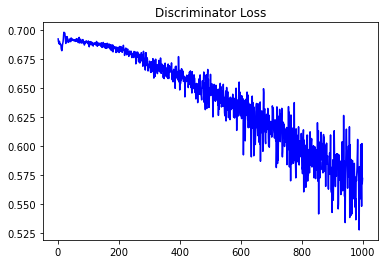

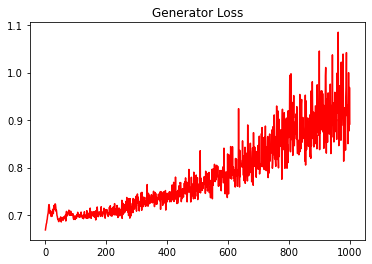

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.7032546685300768


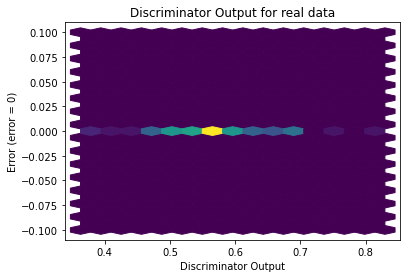

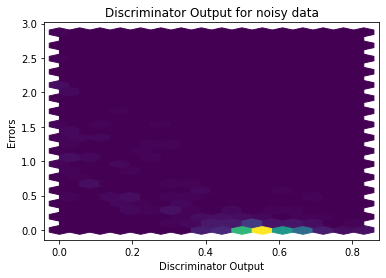

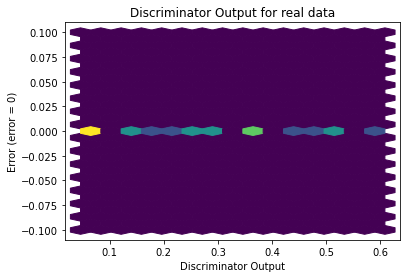

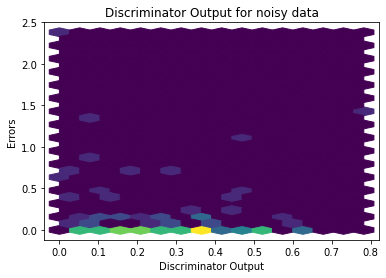

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


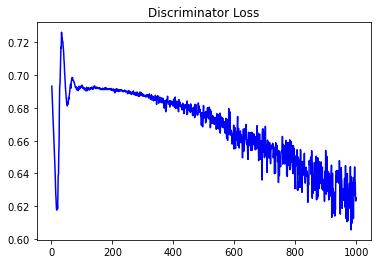

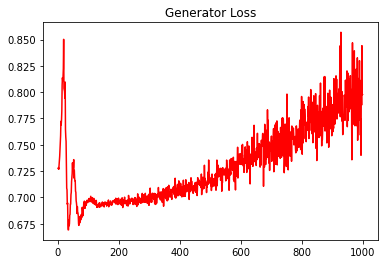

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5291332102408632


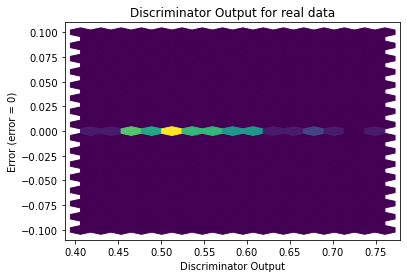

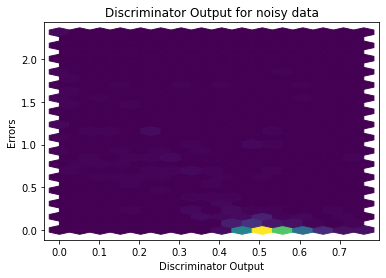

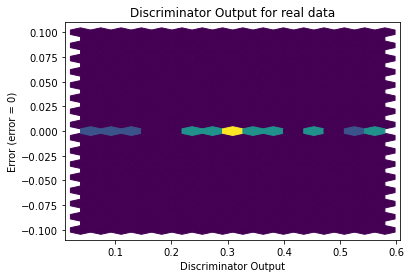

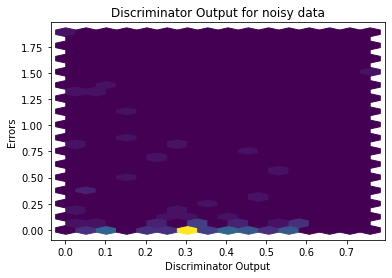

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1627]], requires_grad=True)
